# WITH PANDAS AND MATPLOTLIB

In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import warnings
warnings.filterwarnings('ignore') 

INSTRUCTIONS

1. Number of people by gender
1. Kill weapon
1. Age of killed people
1. Race of killed people
1. Killed People According to Races (Pie Chart)
1. Most common 15 Name or Surname of killed people

<br>

read data

if didn't work you can use this parameters: encoding="windows-1252"

In [3]:
kill = pd.read_csv('PoliceKillingsUS.csv', encoding="windows-1252")

## 1: Plot number of people by gender

In [4]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [5]:
a = kill.groupby("gender").count()["id"].tolist()
a 
b = ["F", "M"]
a

[107, 2428]

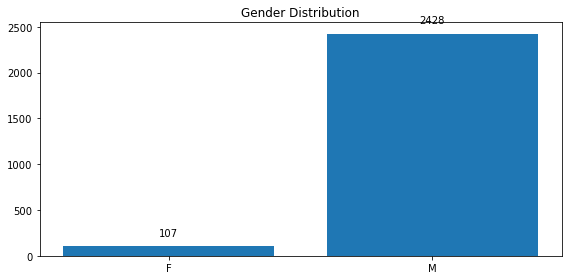

In [6]:
fig, ax = plt.subplots(figsize=(8,4))
ax.bar(b, a);
plt.title("Gender Distribution")
for x,y in zip(b,a):

    label = "{:}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center')
plt.tight_layout()

## 2: Plot 7 most common kill weapons

In [7]:
numbers = kill[["armed"]].value_counts().head(7).values.tolist()
numbers
weapons = ["gun", "knife", "vehicle", "unarmed", "undetermined", "toy weapon", "unkown weapon"]

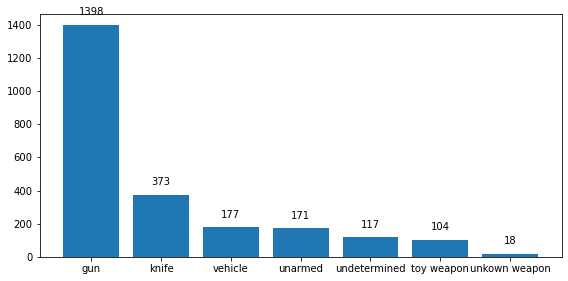

In [8]:
fig, ax = plt.subplots(figsize=(8,4))
ax.bar(weapons, numbers);
plt.tight_layout()
for x,y in zip(weapons,numbers):

    label = "{:}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center')
plt.tight_layout()

## 3: Plot number of age of killed people under two groups : Under 25 and Above 25

In [9]:
above25 = kill[kill["age"]>25]["id"].count()
above25=above25.tolist()
above25

1905

In [112]:
below25 = kill[kill["age"]<25]["id"].count()
below25=below25.tolist()
below25

450

In [36]:
kill[below25].head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
5,11,Kenneth Joe Brown,04/01/15,shot,gun,18.0,M,W,Guthrie,OK,False,attack,Not fleeing,False
6,13,Kenneth Arnold Buck,05/01/15,shot,gun,22.0,M,H,Chandler,AZ,False,attack,Car,False
22,43,Brian Barbosa,11/01/15,shot,gun,23.0,M,H,South Gate,CA,False,attack,Not fleeing,False
26,49,Marcus Golden,14/01/15,shot,vehicle,24.0,M,B,St. Paul,MN,False,attack,Not fleeing,False


In [132]:
ab = above25, below25
ab2 = ["above25", "below25"]

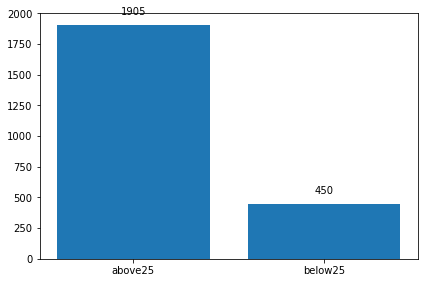

In [218]:
fig, ax = plt.subplots()
ax.bar(ab2, ab);
plt.tight_layout()


for x,y in zip(ab2,ab):

    label = "{:}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center')

## 4: Plot number of killed poeple by race

In [142]:
race = kill["race"].value_counts().values.tolist()
race

[1201, 618, 423, 39, 31, 28]

In [146]:
race2 = ["W", "B", "H", "A", "N", "O"]

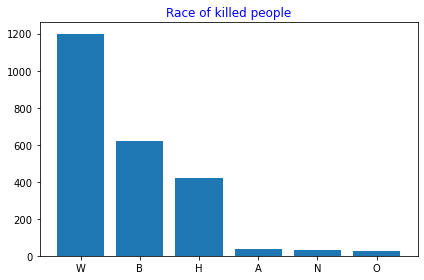

In [213]:
fig, ax = plt.subplots()
ax.bar(race2, race);
plt.title("Race of killed people", color="b")
plt.tight_layout()



## 5: Killed People According to Races (Pie Chart)

In [8]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [163]:
kill.race.unique()

array(['A', 'W', 'H', 'B', 'O', nan, 'N'], dtype=object)

In [178]:
kill.race.value_counts(dropna=False)

W      1201
B       618
H       423
NaN     195
A        39
N        31
O        28
Name: race, dtype: int64

Problem: missing value on race column.

**INSTRUCTION-1: Drop the all raws that contain missing value (dropna)**

In [179]:
kill=kill.dropna()

In [180]:
kill.shape

(2254, 14)

**INSTRUCTION-2: Demonstrate Race Ratio of Killed People by a Pie Chart (You can use Matplotlib)**

In [184]:
kill.race.value_counts()

W    1168
B     592
H     401
A      36
N      29
O      28
Name: race, dtype: int64

In [210]:
kill.race.unique()

array(['A', 'W', 'H', 'B', 'O', 'N'], dtype=object)

In [192]:
numb = kill.race.value_counts().tolist()
numb

[1168, 592, 401, 36, 29, 28]

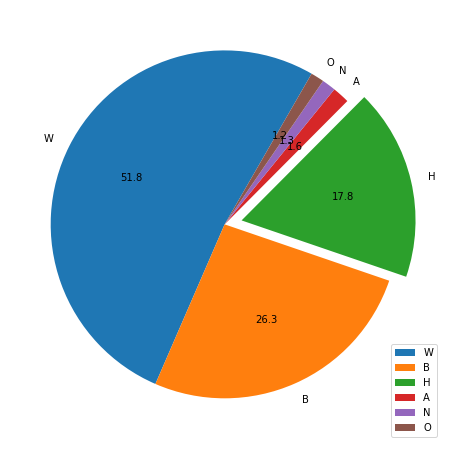

In [207]:
# matplotlib
plt.figure(figsize=(15,8))
myexplode = [0, 0, 0.1, 0, 0, 0]
plt.pie(numb, labels=race2, explode=myexplode, labeldistance=1.1, autopct="%.1f", startangle=60)
plt.legend()
plt.show()